# TP 4 Regression logistique avec régularisation
### Groupe 3:
- Adda Redouane 
- Rahiche Messaoud 
- Krizou Amani 
- Mendil Yousra

# Importation des librairies necessaires au travail

In [20]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
mul = np.matmul

# Lecture des fichiers de données

In [21]:
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

In [22]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

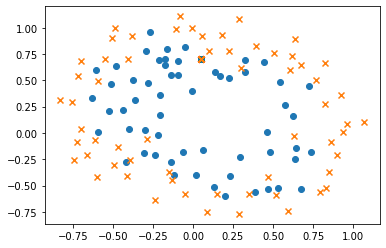

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

# Transformation de données

In [24]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX  

In [25]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [26]:
def Sigmoid(z):
    return np.power(1+np.exp(-z),-1)

0-1 Fonction d'hypothese:

In [27]:
def h(X,theta):
    return Sigmoid(np.dot(X,theta))

In [28]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

In [29]:
def computeCostReg(X,y,theta,lamda):
    m = len(y)
    predictions = Sigmoid(X @ theta)
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost = cost + lamda/(2*m) * sum(theta**2)
    j_0 = 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (lamda/m) * theta[1:]
    grad = np.vstack((j_0[:,np.newaxis], j_1))
    return regCost, grad

2- Fonction de la descente du gradient

In [30]:
def gradientDescent(X, y, theta, alpha, iterations,lamda):
    m = len(y)
    cost_hist = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    
    for i in range(iterations):
        cost , grad = computeCostReg(X,y,theta,lamda)
        theta = theta - (alpha * grad)
        cost_hist[i] = cost
    return theta , cost_hist

In [31]:
# def compute_gradient(theta,x,y,lambda_):
#     m = len(y)
#     gradient = np.zeros(n).reshape(n,)
#     # theta = theta.reshape(n,1)
#     infunc1 = Sigmoid(np.dot(x,theta))-y
#     gradient_in = np.dot(x.transpose(),infunc1)/m
#     gradient[0] = gradient_in[0,0] # theta(0)
#     gradient[1:] = gradient_in[1:,0]+(lambda_*theta[1:,]/m).reshape(n-1,) # theta(j) ; j>0
#     gradient = gradient.flatten()
#     return gradient, theta

# Descente du Gradient : Appel des fonctions

In [32]:
def normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_Norm = (X - mu)/sigma
    return X_Norm

In [33]:
n=X2.shape[1]
theta = np.zeros((n, 1))

In [34]:
initialCost, initGrad=computeCostReg(X2,y,theta,0)
print(initialCost)

[0.69314718]


In [55]:
# paramètres
iterations = 1500;
alpha = 0.01;

# paramètre de regression
lamda = 0;

# Appel
theta , cost_hist = gradientDescent(X2, y, theta, alpha, iterations,lamda)
#  compute_gradient(theta,X, y,lamda);
# print(theta)

Text(0.5, 1.0, 'fonction du cout utilisant la descente du gradiant')

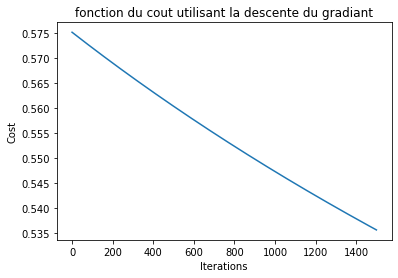

In [56]:
plt.plot(cost_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("fonction du cout utilisant la descente du gradiant")


# Dessin de la limite de decision (Descision Boundary)

In [37]:
def mapFeaturePlot(x1, x2, degree):
    export = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j)
            export = np.hstack((export,terms))
    return export

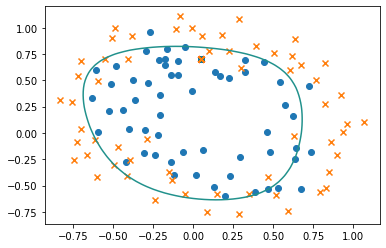

In [57]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

u_val = np.linspace(-0.75,1,50)
v_val = np.linspace(-0.75,1,50)
z = np.zeros((len(u_val),len(v_val)))
for i in range(len(u_val)):
    for j in range(len(v_val)):
        z[i,j] = mapFeaturePlot(u_val[i],v_val[j],6) @ theta
        # print(z[i,j])

plt.contour(u_val,v_val,z.T,0)

# Classification (Prédiction)

In [39]:
def predict(X,theta):
    y_pred = X.dot(theta)
    return y_pred>0

In [58]:
p = predict(X2, theta)

# Qualité du classifieur

In [59]:
y_pred=predict(X2, theta)
prcision = np.mean(y_pred==y)*100
print("Precision : ", (np.mean(p==y)*100),"%")

Precision :  80.50847457627118 %


# Vérification de l'implementation